# Chapter 3 (con't): Graphics and Visualization
## 3D Graphics (Section 3.4)

* When one thinks about computer graphics, movies and animations come to mind.  However scientific visualization is usually not as flashy and Hollywood, but one can try!
* To start, we will be making simple 3D plots with `matplotlib`, but there are other packages available for better 3D visualizations.
* We will not be covering these packages because they require them to be installed, but feel free to explore them outside of class and perhaps use them in your project.
* Some examples include
    * [Bokeh](https://bokeh.org/)
    * [VisPy](http://vispy.org/) : Requires knowledge of OpenGL
    * [pythreejs](https://github.com/jovyan/pythreejs) : Also needs OpenGL experience
    * [Mayavi](http://docs.enthought.com/mayavi/mayavi/) : A very powerful 3D plotting package. No OpenGL or Javascript required!

***

* The book uses VPython through the `visual` module.  In most cases, this module is useful, however it is not compatible with notebooks.
* We will use the 3D graphs that are native to `matplotlib` here.
* Below is one example of a scatter plot in 3D.
* To allow the user to interact with the figure, the magic `%matplotlib widget` must be issued, which you need to install the [ipympl](https://matplotlib.org/ipympl/) extension.
* You can find many more examples here: http://matplotlib.org/gallery.html#mplot3d

First we import the usual `numpy` and `matplotlib` modules, but we also import the `Axes3D` routine for 3D support.

In [17]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

* In the code below, we generate 100 random points in the range (x,y,z) = (23,0,-60) -> (50,100,-25) for the red circles and (x,y,z) = (23,0,-25) -> (50,100,-5) for the blue triangles.
* Notice that when we initialize the figure with `plt.figure()`, which is yet another initialization method that gives the user more control, we add a subplot whose projection is 3D.
* After plotting these two random datasets in the loop, we set the axis labels and show the figure.
* Left-click and drag: rotation
* Right-click and drag: zoom

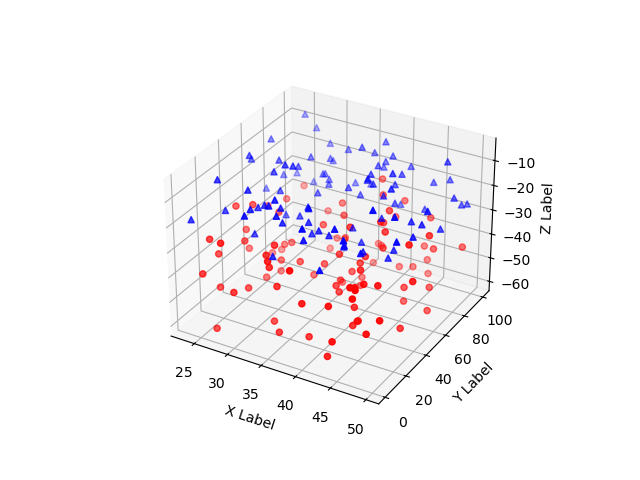

In [18]:
# Taken from http://matplotlib.org/gallery.html#mplot3d

# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 50)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

* We must issue `close()` to halt the plot interactivity, so we can move onto the next figure.

In [19]:
plt.close()

## Animation (Section 3.5)
* The evolution of a system can be visualized in an animation.
* We can control the time evolution manually through a widget, or
* We can create many images that can be combined together into a movie (mp4, mov, etc.) later.
* If a picture is worth a 1000 words, then a movie is worth a 1000 pictures.

***

* In a movie, the user can watch the evolution repeatedly, inspecting the system for any type of behavior in the variables plotted.
* Animations are very useful when making discoveries because peculiarities might *pop out* when the system is visualized.  It's hard to plot some quantity or region in simulated space if one doesn't know what to look for!

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Plotting package

# Import ipywidgets
from ipywidgets import widgets, interact, interactive
from IPython.display import display

interactive(children=(IntSlider(value=179, description='i', max=359), Output()), _dom_classes=('widget-interac…

<function __main__.plot(i)>

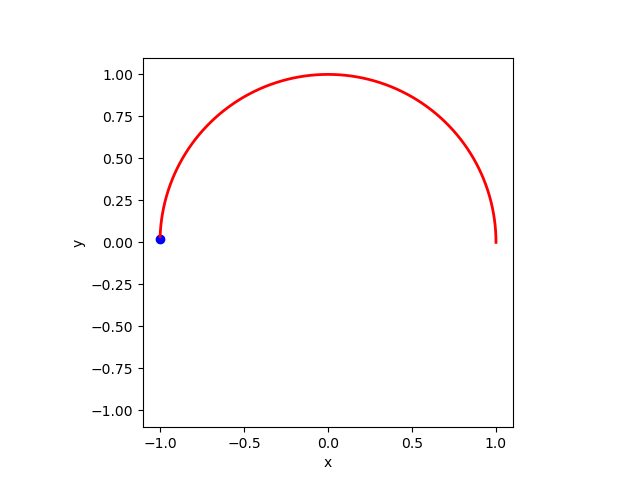

In [2]:
%matplotlib widget
values = np.arange(0,360)
x = np.cos(values*np.pi/180)
y = np.sin(values*np.pi/180)

def plot(i):
    plt.clf()
    plt.plot(x[:i], y[:i], ls='-', c='r', lw=2)
    plt.scatter(x[i], y[i], c='b', marker='o')
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    plt.xlabel('x')
    plt.ylabel('y')
    ax = plt.gca()
    ax.set_aspect('equal')
    
interact(plot, i=(0,359))

In [3]:
plt.close()

## Using the `animation` module in `matplotlib`
* `matplotlib` also has an animation module that can update plots automatically, called `animation()`
* Its usage isn't as straightforward as creating a single plot.
* First the plot needs to be initialized (axis labels and limits, figure size, etc.)
* Second only the data in the plot is updated through the `set_data()` command.
* Only updating the plotted data and not the entire figure makes the updating faster and thus smoother.

In [3]:
# For completeness, import the modules here (even though they're already loaded.  
# This makes it easier to copy-paste.)
import numpy as np
import matplotlib.pyplot as plt  # Plotting package
from matplotlib import animation
%matplotlib widget

* Create the function (a circle) that we want to plot.
* A more realistic example would be a system that's evolving with time.  One can think of this circle as an orbit.

In [4]:
values = np.arange(0,360)
x = np.cos(values*np.pi/180)
y = np.sin(values*np.pi/180)

* For figure placement in the notebook, the creation of the initial figure, the initialization and update functions, and animation calls all need to be in the same programming block.

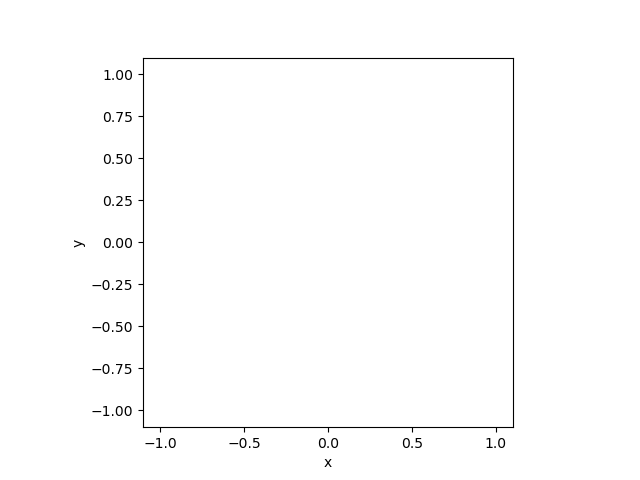

In [5]:
# Create an empty figure in which we will plot
fig, ax = plt.subplots()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
ax.set_aspect('equal')  # Set the aspect ratio of the figure to be equal

# Initialize an empty plot.  Set the line characteristics here.
circle, = ax.plot([], [], color="b", lw=2)

# The animation routine requires an initialization routine, even though 
# it does the same thing as above.
def init():
    circle.set_data([], [])
  
# Function that updates the plot, showing the data from elements 0->n
def update(n):  # n = frame counter
    # Just for same measure, make sure that we don't try to plot data
    # outside of the data range, which has 360 points.
    i = n % 360
    circle.set_data(x[:i], y[:i])

# Function to animate the figure.
# First argument: figure to update
# Second argument: function that updates the figure
# Other arguments: initialization function, # of frames to show, 
# whether to update the whole plot, and how many milliseconds between frames.
ani = animation.FuncAnimation(fig, update, init_func=init, frames=300, 
                              blit=False, interval=100)
plt.show()

In [6]:
plt.close()

And most importantly, you can save it to a file

In [7]:
ani.save('partial-orbit2.mp4', fps=15)

In [8]:
a= ax.plot([], [], color="b", lw=2)
print(type(a[0]))

<class 'matplotlib.lines.Line2D'>


* There are several other examples on the matplotlib site, https://matplotlib.org/stable/gallery/animation/index.html
* I have included a few of them in separate notebooks, which we will review in class if there is time.
    * `06_AnimationExample.ipynb`
    * `06_Animation3D.ipynb`

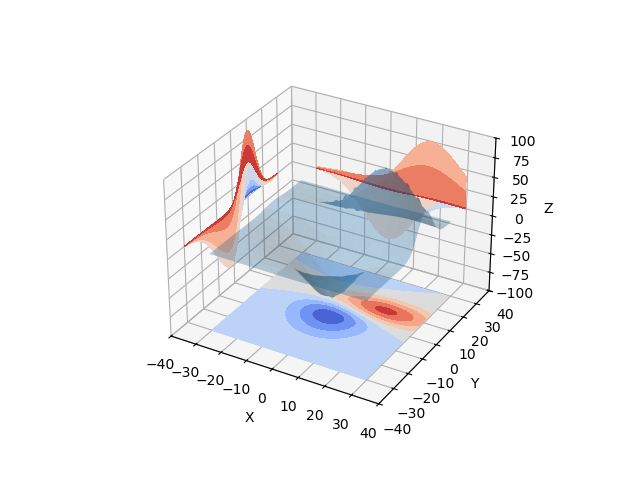

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm, )
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

In [ ]:
Z

In [10]:
plt.close()